In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()


@@@@@@@@@@@@@@@@@

controlling x and y ticks

so, x and y ticks by default are:

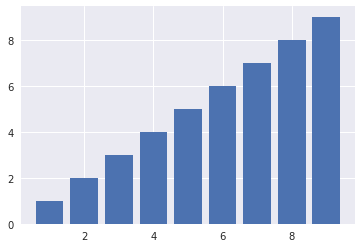

In [69]:
fig = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.show()

using plt.xticks and plt.yticks methods we set number of ticks

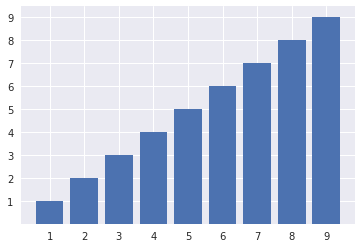

In [70]:
fig0 = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.xticks(list(range(1,10))) # <<< 
plt.yticks(list(range(1,10))) # <<<
plt.show()

@@@@@@@@@@@@@@@@

stacked bar chart

you need "bottom" parameter 
1. this parameter must be the sum of the previous data (which it stands on)
2. perhaps, you'll have to create numpy array to sum the data up

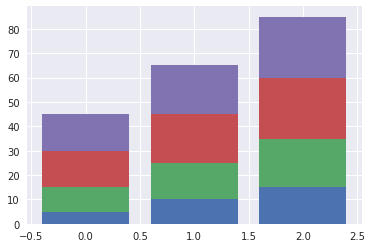

In [71]:
stack_bar = plt.figure()
b = [5,10,15]
b1 = [10, 15, 20]
b2 = [15, 20, 25]
b3 = [20, 25, 30]

plt.bar(list(range(len(b))), b)
plt.bar(list(range(len(b1))), b1, bottom=b) # <<<<<<
plt.bar(list(range(len(b2))), b2, bottom=np.array(b) + np.array(b1))  # <<<<<<
plt.bar(list(range(len(b2))), b2, bottom=np.array(b) + np.array(b1) + np.array(b2))  # <<<<<<

plt.show()

@@@@@@@@@@@@@@@@@@@@@@@

1. setting x labels
2. setting label rotation
3. setting label font

by the "set_xticks" and "set_xticklabels" methods of the axes obj

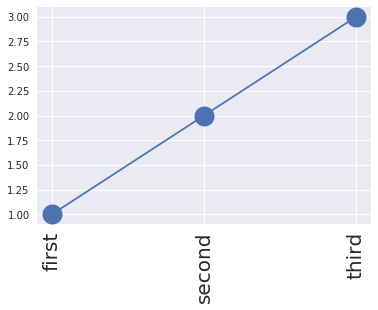

In [72]:
fig1 = plt.figure()
ax = plt.axes()  # <<<< ax obj
 
labels = ["first", "second", "third"] # <<< labels are stored in here

plt.plot(range(1,4), range(1,4), marker="o", ms="20")

ax.set_xticks([1,2,3]) # <<<<< setting numbers of ticks
ax.set_xticklabels(labels, rotation="vertical", fontsize="20") # <<<< setting labels, rotation and font

plt.show()

@@@@@@@@@@@@@@@

line width, marker size

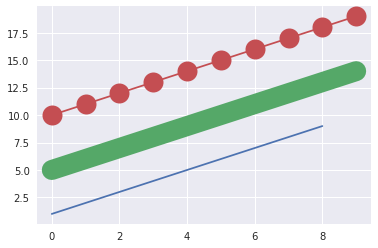

In [73]:
fig2 = plt.figure()

data = np.arange(1,10)
data1 = np.arange(5, 15)
data2 = np.arange(10, 20)

plt.plot(list(range(len(data))), data)
plt.plot(list(range(len(data1))), data1, marker="o", linewidth=20) # <<<<< 
plt.plot(list(range(len(data2))), data2, marker="o", ms="20") # <<<<<

plt.show()


@@@@@@@@@@@@@@@@@@@@

controlling figure size

add "figsize" parameter to "myfig = plt.figure() call"

"figsize" is a tuple of width and height

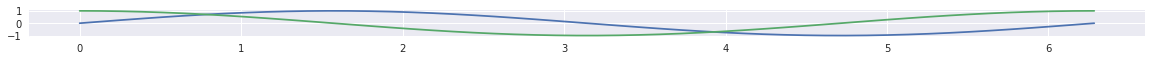

In [74]:
fig = plt.figure(figsize=(20, 0.5))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

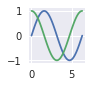

In [75]:
fig = plt.figure(figsize=(1, 1))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

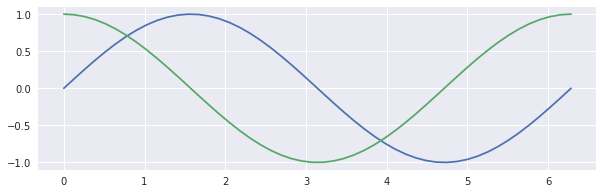

In [76]:
fig = plt.figure(figsize=(10, 3))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()